In [ ]:
# Basic semantics operations

In [15]:
# FastText library is based on the skipgram model, each word is represented by character n-grams (their sums). 
# Better than word2vec and GloVe.

In [16]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries

In [ ]:
import fasttext
from fasttext import train_unsupervised
import os
from scipy import stats
from fasttext import train_supervised
from torch.nn.modules.sparse import EmbeddingBag
import numpy as np
import torch
import random
import string
import time
from fasttext import load_model
from torch.autograd import Variable
import argparse
import re
import nltk
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_colwidth = 200
%matplotlib inline

In [27]:
# 1 Basic Text Normalisation and Categorisation

In [ ]:
# Creaate data frame and category for each sentense

In [18]:
document = ['The Sequential model is a linear stack of layers.',
          'Perplexity is a measurement of how well a probability distribution or probability model predicts a sample.',
          'Tesorflow initializers are random normal, random uniform, truncated normal, zeros, ones, Glorot normal, Glorot uniform, He normal,  He uniform, Identity, orthogonal, uniform, constant, variance scaling, custom.',
          'TSNE is a statistical method for visualising high-dimensional data.',
          'Xavier/Glorot Initialization is used to maintain the same smooth distribution for both the forward pass as well the backpropagation.',
          'CBOW architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).',
          'Available optimizers are adam, adadelta, adagrad, addamax, nadam, ftrl, SGD, RMSprop.'    
]
labels = ['model', 'model', 'initializer', 'visualisation', 'initializer', 'achitecture', 'optimizers']

document_array = np.array(document)
document_df = pd.DataFrame({'Sentense': document_array, 
                          'Category': labels})
document_df = document_df[['Sentense', 'Category']]
document_df

,Sentense,Category
0,The Sequential model is a linear stack of layers.,model
1,Perplexity is a measurement of how well a probability distribution or probability model predicts a sample.,model
2,"Tesorflow initializers are random normal, random uniform, truncated normal, zeros, ones, Glorot normal, Glorot uniform, He normal, He uniform, Identity, orthogonal, uniform, constant, variance sc...",initializer
3,TSNE is a statistical method for visualising high-dimensional data.,visualisation
4,Xavier/Glorot Initialization is used to maintain the same smooth distribution for both the forward pass as well the backpropagation.,initializer
5,CBOW architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).,achitecture
6,"Available optimizers are adam, adadelta, adagrad, addamax, nadam, ftrl, SGD, RMSprop.",optimizers


In [ ]:
# download stopwords package 

In [19]:
from nltk import *
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# prepare stop words or normalisation

In [23]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

norm_document = np.vectorize(normalize_document)

In [ ]:
# create array from data frame, include the defined text transformation

In [24]:
norm_doc = norm_document(document_array)

In [25]:
norm_doc

array(['sequential model linear stack layers',
       'perplexity measurement well probability distribution probability model predicts sample',
       'tesorflow initializers random normal random uniform truncated normal zeros ones glorot normal glorot uniform normal uniform identity orthogonal uniform constant variance scaling custom',
       'tsne statistical method visualising highdimensional data',
       'xavierglorot initialization used maintain smooth distribution forward pass well backpropagation',
       'cbow architecture tries predict current target word center word based source context words surrounding words',
       'available optimizers adam adadelta adagrad addamax nadam ftrl sgd rmsprop'],
      dtype='<U184')

In [ ]:
# 2 nltk packages and libraries

In [127]:
# 2.1.Gutenberg and punkt package

In [29]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
# 2.2. Print number of lines and selected lines in tokenized and normalized text

In [129]:
from nltk.corpus import gutenberg
from string import punctuation

book = gutenberg.sents('shakespeare-macbeth.txt') 
remove_terms = punctuation + '0123456789'

norm_book = [[word.lower() for word in sent if word not in remove_terms] for sent in book]
norm_book = [' '.join(tok_sent) for tok_sent in norm_book]
norm_book = filter(None, norm_document(norm_book))
norm_book = [tok_sent for tok_sent in norm_book if len(tok_sent.split()) > 2]

print('Total lines:', len(book))
print('\nSample line:', book[10])
print('\nProcessed line:', norm_book[120:140])

Total lines: 1907

Sample line: ['3', '.']

Processed line: ['enter macbeths wife alone letter', 'met day successe haue learn perfect st report haue mortall knowledge', 'burnt desire question made themselues ayre vanish', 'whiles stood rapt wonder came missiues king hail thane cawdor title weyward sisters saluted referr comming time haile king shalt', 'haue thought good deliuer thee dearest partner greatnesse thou might st loose dues reioycing ignorant greatnesse promis thee', 'lay thy heart farewell', 'glamys thou art cawdor shalt thou art promis yet doe feare thy nature full th milke humane kindnesse catch neerest way', 'thou would st great art without ambition without illnesse attend', 'thou would st highly would st thou holily would st play false yet would st wrongly winne', 'thould st haue great glamys cryes thus thou must doe thou haue rather thou st feare doe wishest vndone', 'high thee hither may powre spirits thine eare chastise valour tongue impeides thee golden round fate me

In [33]:
book

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [130]:
# 3. Keras libraries

In [131]:
# 3.1. Tokenize words in file in Keras library

In [132]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_book)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_book]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 3234
Vocabulary Sample: [('haue', 1), ('thou', 2), ('shall', 3), ('vpon', 4), ('thee', 5), ('th', 6), ('vs', 7), ('yet', 8), ('thy', 9), ('come', 10)]


In [36]:
# Print 10. lines from List

In [37]:
wids[0:10]

[[1177, 13, 1178, 1179],
 [15, 92, 210],
 [3, 92, 233, 51],
 [496, 1180, 1181],
 [1182, 1183, 31, 1184, 234, 695],
 [74, 182, 497],
 [10, 1185, 1186],
 [1187, 696, 235, 236, 284, 284, 236, 1188, 1189, 697, 75],
 [15, 22, 1190, 237, 160, 238, 285, 698, 1191],
 [183, 1192, 1193, 699, 700, 211]]

In [133]:
# 3.2. Define function to generate semantics context words pairs 

In [134]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [41]:
# Generate pairs using the created function

In [135]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['hurley', 'burley', 'battaile', 'lost'] -> Target (Y): done
Context (X): ['burley', 'done', 'lost', 'wonne'] -> Target (Y): battaile
Context (X): ['padock', 'calls', 'faire', 'foule'] -> Target (Y): anon
Context (X): ['calls', 'anon', 'foule', 'foule'] -> Target (Y): faire
Context (X): ['anon', 'faire', 'foule', 'faire'] -> Target (Y): foule
Context (X): ['faire', 'foule', 'faire', 'houer'] -> Target (Y): foule
Context (X): ['foule', 'foule', 'houer', 'fogge'] -> Target (Y): faire
Context (X): ['foule', 'faire', 'fogge', 'filthie'] -> Target (Y): houer
Context (X): ['faire', 'houer', 'filthie', 'ayre'] -> Target (Y): fogge
Context (X): ['enter', 'king', 'donalbaine', 'lenox'] -> Target (Y): malcome
Context (X): ['king', 'malcome', 'lenox', 'attendants'] -> Target (Y): donalbaine


In [136]:
# 3.3. Create CBOW sequential model

In [45]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 100)            323400    
                                                                 
 lambda_1 (Lambda)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3234)              326634    
                                                                 
Total params: 650,034
Trainable params: 650,034
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Use CBOW sequential model to plot model into graph

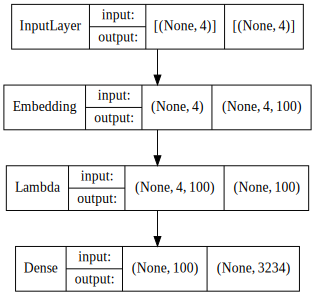

In [46]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, dpi=70, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
# Use CBOW model to generate conext words in 6 epochs

In [ ]:
# original 10000 pairs take 10 minutes to run for 6 epochs
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 10000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 67443.78224253654

Epoch: 2 	Loss: 66641.1275383234

Epoch: 3 	Loss: 69977.248280406

Epoch: 4 	Loss: 77492.0529152751

Epoch: 5 	Loss: 81079.85475215316



In [ ]:
# Create array of weights in CBOW model

In [50]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

(3233, 100)


In [52]:
# Print first 5 vectors in List

In [57]:
weights[0:5]

array([[ 0.0427745 ,  0.04188111,  0.03006885, -0.01805039, -0.00842864,
         0.01241868, -0.0452221 ,  0.01915265, -0.01473318,  0.00429633,
        -0.00531691, -0.02870755,  0.04556752, -0.02364677, -0.000185  ,
         0.00270172,  0.01513261, -0.03012961, -0.01763308, -0.02040341,
         0.03853283,  0.03123866,  0.02680292,  0.01760838, -0.01793486,
        -0.01386626,  0.02345603, -0.00670829, -0.00441153,  0.04807793,
        -0.03712845,  0.02859202, -0.00831461,  0.04822778,  0.01281575,
        -0.03262915, -0.0437791 , -0.02326169, -0.04443422, -0.04106192,
        -0.01078746,  0.00676268, -0.03841494,  0.03001228,  0.01137204,
         0.04232423, -0.03721373, -0.00896344,  0.0192417 ,  0.00900121,
        -0.03757904, -0.00451948,  0.03609547,  0.02498013,  0.03954421,
         0.01044617,  0.03100625,  0.01483846,  0.03418822, -0.03739733,
        -0.01404493,  0.03115723,  0.02498909,  0.03016528, -0.03938266,
        -0.00269037,  0.04177256, -0.03396626,  0.0

In [58]:
# Calculate distances among generated word pairs and see similar words

In [59]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['souldier', 'king', 'sir', 'friend']}

similar_words

(3233, 3233)


{'souldier': ['shield', 'drum', 'rauen', 'helpe', 'enfold'],
 'king': ['vault', 'ague', 'loues', 'niggard', 'euerlasting'],
 'sir': ['commands', 'armor', 'delights', 'smack', 'doome'],
 'friend': ['returne', 'palpable', 'rubbes', 'indeede', 'nice']}

In [ ]:
# 3.4. Use keras prepprocessing libraries to tokenize and normalise text and create vocabulary

In [61]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_book)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_book]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 3234
Vocabulary Sample: [('haue', 1), ('thou', 2), ('shall', 3), ('vpon', 4), ('thee', 5), ('th', 6), ('vs', 7), ('yet', 8), ('thy', 9), ('come', 10)]


In [62]:
# generate skipgrams using the vocabulary

In [63]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(tragedie (1177), william (1178)) -> 1
(macbeth (13), william (1178)) -> 1
(tragedie (1177), crost (2028)) -> 0
(shakespeare (1179), william (1178)) -> 1
(shakespeare (1179), macbeth (13)) -> 1
(william (1178), hounds (2036)) -> 0
(macbeth (13), approue (1531)) -> 0
(tragedie (1177), meate (1026)) -> 0
(macbeth (13), tragedie (1177)) -> 1
(shakespeare (1179), chambers (3059)) -> 0


In [ ]:
# 3.5. import other keras libraries

In [64]:
from keras.layers import merge, Concatenate
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers.merge import concatenate

In [ ]:
# create sequential word and context models

In [65]:
word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
word_model.add(Reshape((embed_size, )))

context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1))
context_model.add(Reshape((embed_size,)))

In [ ]:
# create sequential from previous 2 models 

In [67]:
model = Sequential()

In [69]:
model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [70]:
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [71]:
model.add(Concatenate([word_model, context_model]))

In [73]:
# Import library and vector space to visualise word context from weights array
# pairwise contextually similar words using calculated euclidean distances

Total words: 24 	Word Embedding shapes: (24, 100)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


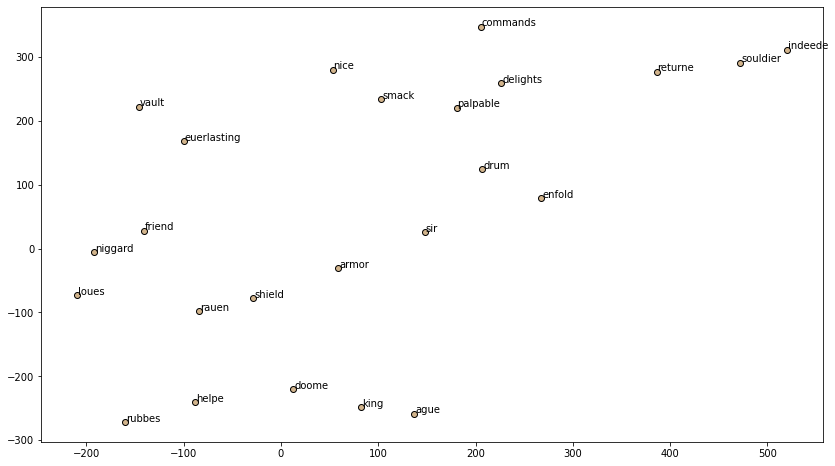

In [72]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='tan', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
# 4. gensim

In [ ]:
# Use gensim semantics library to see similar words

In [77]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_book]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['souldier', 'shakespeare', 'king', 'sir', 'friend']}
similar_words

{'souldier': ['thunders', 'discomfort', 'shipwracking', 'marke', 'direfull'],
 'shakespeare': ['valiant', 'sits', 'wife', 'physicke', 'confinelesse'],
 'king': ['fife', 'worthy', 'macduffe', 'greater', 'hail'],
 'sir': ['drinke', 'gall', 'worke', 'send', 'holy'],
 'friend': ['whence', 'gainst', 'spirit', 'beyond', 'arme']}

In [ ]:
# Import library and vector space to visualise word context from gensim similar words array

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


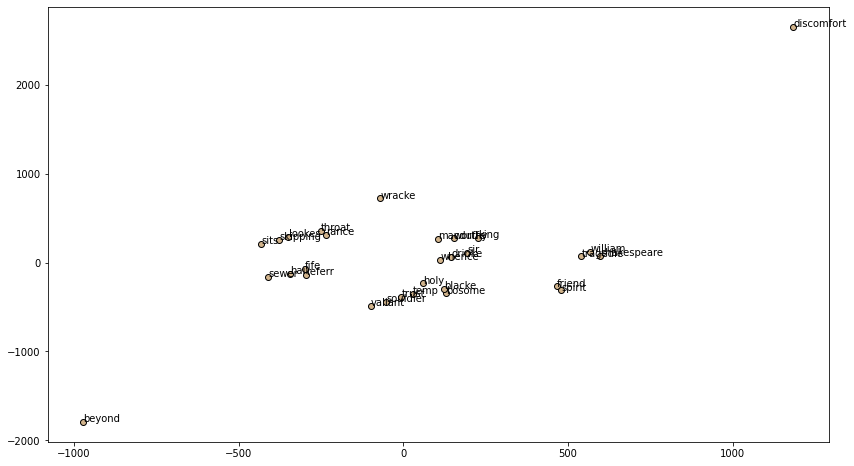

In [ ]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='tan', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
# 5. Use nltk predefined Word punct tokenizer to create w2v model

In [78]:
wpt = nltk.WordPunctTokenizer()
tokenized_doc = [wpt.tokenize(sentense) for sentense in norm_book]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_doc, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, iter=100)

In [ ]:
# Import space to display w2v model

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


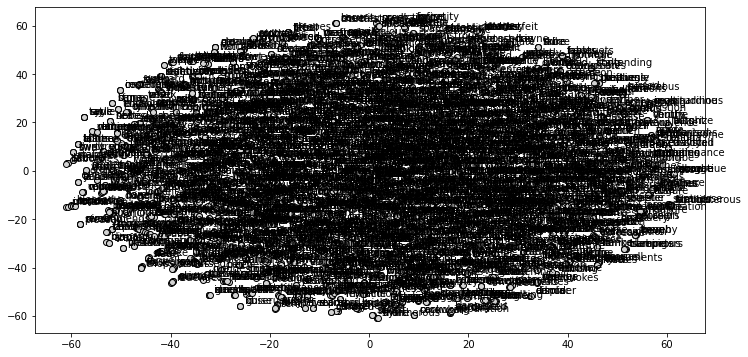

In [83]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='lightgrey', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [138]:
words[1:10]

['could',
 'oh',
 'sound',
 'health',
 'faire',
 'shakespeare',
 'shake',
 'peace',
 'feare']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


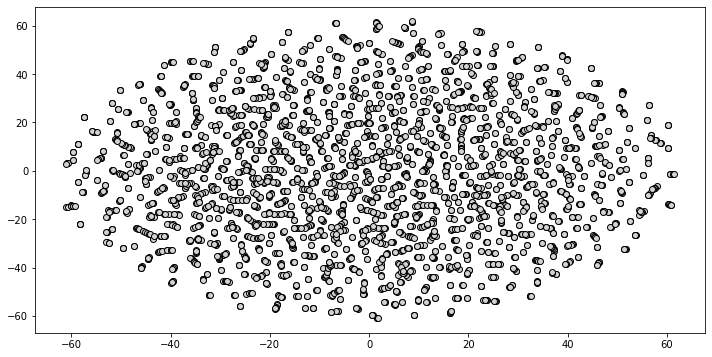

In [144]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=500, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='lightgrey', edgecolors='k')


In [ ]:
# See the example vector for given word 

In [145]:
w2v_model.wv['person']

array([-2.0210009 ,  0.68384117, -1.4971333 ,  0.579331  , -0.0490204 ,
       -0.8107044 ,  0.18492565,  0.1385413 , -0.71838653, -0.13449617],
      dtype=float32)

In [146]:
# 6. Use zeros to create word vectors

In [147]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(document, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in document ]
    return np.array(features)

In [154]:
w2v_feature_array = averaged_word_vectorizer(document=tokenized_doc, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


ValueError: ignored

In [ ]:
# 7. Affinity propagation

In [155]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
doc_labels = ap.labels_
doc_labels = pd.DataFrame(doc_labels, columns=['DocLabel'])
pd.concat([document_df, doc_labels], axis=1)

,Sentense,Category,DocLabel
0,The Sequential model is a linear stack of layers.,model,43
1,Perplexity is a measurement of how well a probability distribution or probability model predicts a sample.,model,36
2,"Tesorflow initializers are random normal, random uniform, truncated normal, zeros, ones, Glorot normal, Glorot uniform, He normal, He uniform, Identity, orthogonal, uniform, constant, variance sc...",initializer,11
3,TSNE is a statistical method for visualising high-dimensional data.,visualisation,30
4,Xavier/Glorot Initialization is used to maintain the same smooth distribution for both the forward pass as well the backpropagation.,initializer,34
...,...,...,...
859,NaN,NaN,5
860,NaN,NaN,5
861,NaN,NaN,40
862,NaN,NaN,54


In [ ]:
# 8. PCA

IndexError: ignored

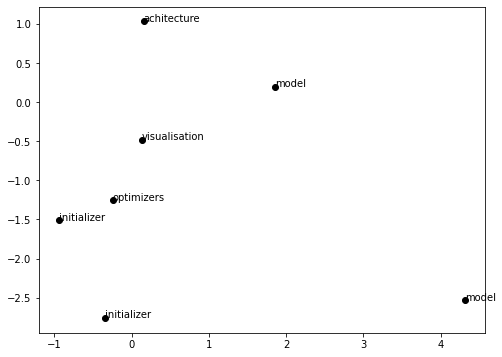

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(document_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'tan' if label == 0 else 'grey' if label == 1 else 'black'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')

In [ ]:
# 9. Use spacy

In [157]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import spacy dictionary

In [158]:
import spacy

import en_core_web_sm



nlp = spacy.load('en_core_web_sm')

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 0


In [ ]:
# 10. Use glove to calculate unique words

In [159]:
unique_words = list(set([word for sublist in [doc.split() for doc in norm_doc] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
addamax,0.179949,0.282289,1.009438,-1.049538,0.074111,1.840592,-1.190033,0.380817,2.041721,-0.533708,...,-0.597283,0.116668,-1.086348,1.709749,-1.390299,0.081280,-0.065881,1.426812,0.479166,2.022729
current,0.020417,1.531191,0.886479,0.520747,0.277354,1.119208,0.539278,-0.623021,0.296906,-1.287353,...,0.959054,0.397961,-1.042966,2.725302,-0.602419,-0.477257,-0.127280,0.620425,0.841645,1.329957
optimizers,1.329374,0.539882,-0.689665,-1.355235,-1.331535,1.346468,0.839137,0.814404,-0.216685,-0.731668,...,-0.363565,0.364122,-1.356674,-1.187253,-1.434347,-0.863398,-0.738422,2.099089,0.992584,-0.709731
adadelta,1.143459,0.574693,0.542926,-0.866831,-0.589201,1.347344,-0.013627,0.552031,0.398138,-1.120552,...,0.717575,0.182060,-1.786164,1.058770,-0.406435,0.018725,-0.398065,0.767839,0.620377,0.510965
method,0.651152,1.790741,1.029910,-1.116685,0.682702,0.684147,-0.307660,0.052985,1.055370,-0.343423,...,0.087497,0.901139,-2.129328,1.624106,-1.365911,-0.070450,0.102885,1.287019,0.661309,1.346691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
random,0.653416,2.095540,-0.271165,-0.480442,0.026360,1.050596,0.544162,-0.636253,0.849770,-0.859314,...,0.618453,-0.159134,-2.122838,2.105223,0.491994,0.239325,-0.125078,-1.061257,0.252698,0.490090
adagrad,0.910837,1.654124,0.271695,1.402854,-0.213173,1.759492,-0.410778,-0.318740,0.529632,-1.240732,...,-0.086531,1.106825,-1.937496,1.542334,-0.973617,-0.567794,-0.837176,0.983639,1.201253,1.329961
statistical,0.551857,2.278343,-0.280229,0.843984,0.218206,0.619147,0.168992,0.055814,-0.001031,-0.948482,...,-0.072448,-0.026816,-1.689839,1.405542,0.633858,-1.545343,-0.295011,-0.679576,0.497347,0.634984
scaling,1.541793,0.673228,-0.681616,0.548391,0.492752,0.543548,0.431671,0.475628,-0.344633,-0.760205,...,-0.430322,-1.126825,-0.126007,1.842938,0.316677,-1.195425,0.488643,-0.302227,1.135160,-0.130881


In [ ]:
# Display unique words in manifold

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


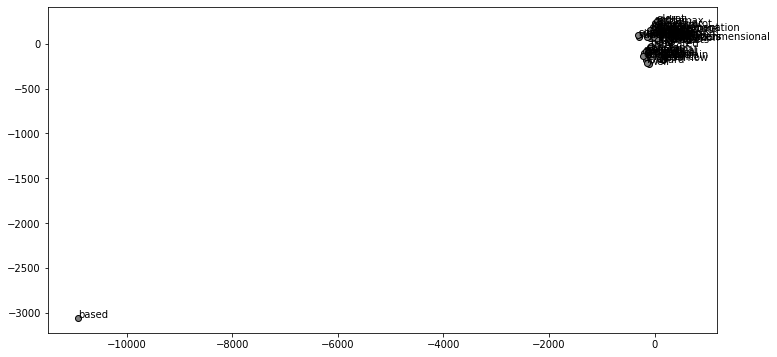

In [160]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='grey', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
# 11. Create category clusters from unique words created by glove

In [161]:
from sklearn import cluster

In [162]:
from sklearn.cluster import *

In [163]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_doc])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['DocLabel'])
pd.concat([document_df, cluster_labels], axis=1)

,Sentense,Category,DocLabel
0,The Sequential model is a linear stack of layers.,model,2
1,Perplexity is a measurement of how well a probability distribution or probability model predicts a sample.,model,1
2,"Tesorflow initializers are random normal, random uniform, truncated normal, zeros, ones, Glorot normal, Glorot uniform, He normal, He uniform, Identity, orthogonal, uniform, constant, variance sc...",initializer,0
3,TSNE is a statistical method for visualising high-dimensional data.,visualisation,0
4,Xavier/Glorot Initialization is used to maintain the same smooth distribution for both the forward pass as well the backpropagation.,initializer,1
5,CBOW architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).,achitecture,1
6,"Available optimizers are adam, adadelta, adagrad, addamax, nadam, ftrl, SGD, RMSprop.",optimizers,2


In [165]:
# 12. Use gensim fasttext to tokenize words

In [167]:
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_doc = [wpt.tokenize(document) for document in norm_book]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words


ft_model = FastText(tokenized_doc, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)

In [168]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['souldier', 'shakespeare', 'king', 'sir', 'friend']}
similar_words

{'souldier': ['could', 'oh', 'sound', 'health', 'faire'],
 'shakespeare': ['shake', 'peace', 'feare', 'care', 'eare'],
 'king': ['meeting', 'attend', 'attendants', 'lenox', 'comming'],
 'sir': ['send', 'doctor', 'drinke', 'sit', 'anon'],
 'friend': ['friends', 'enough', 'certaine', 'loue', 'fall']}

In [ ]:
# 13. Use PCA to calculate word similarity

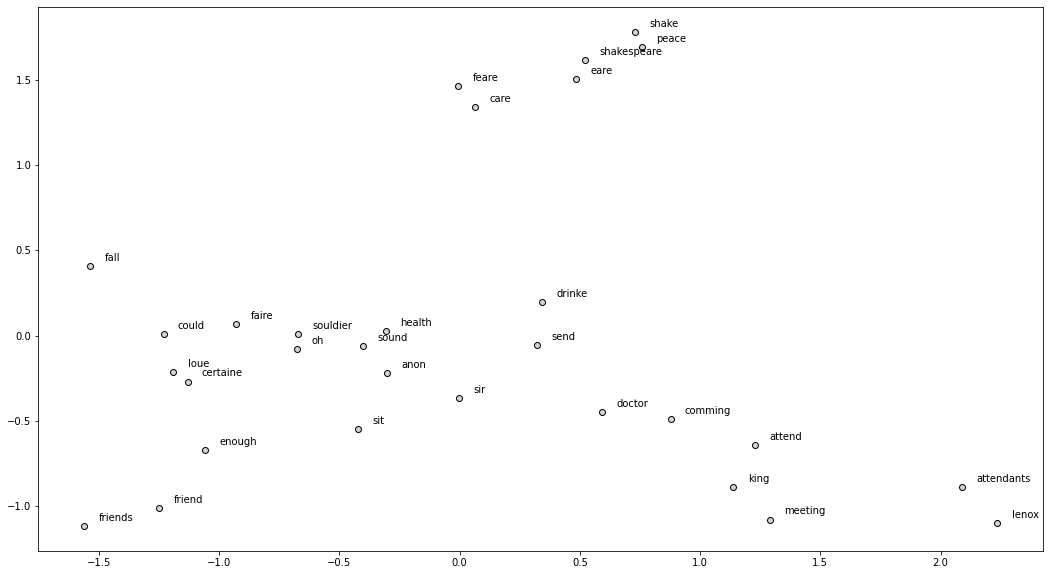

In [169]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgrey', edgecolors='k')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [ ]:
# See array for given word

In [115]:
ft_model.wv['friend']

array([ 0.1222973 ,  0.00124597,  0.06418609, -0.01047995,  0.02209861,
        0.15007816,  0.28737977, -0.20166203,  0.03766511,  0.09462842,
        0.05992124,  0.63176167, -0.20573807, -0.1728858 ,  0.01267911,
       -0.03240059, -0.15814638, -0.2784895 ,  0.3840526 ,  0.13631397,
       -0.18659201,  0.3393464 , -0.6593707 , -0.0891635 ,  0.22952715,
       -0.32928127, -0.27784145, -0.08307667, -0.18078831, -0.3407957 ,
       -0.31854168, -0.37069392, -0.05257382,  0.47830927, -0.07024311,
       -0.1120484 , -0.07640022,  0.36426246,  0.11293622, -0.11594155,
        0.03190442,  0.09213012, -0.70500743,  0.23280792, -0.27399728,
       -0.08663771,  0.02168861,  0.05300018,  0.02973137, -0.01103548,
       -0.16038355,  0.6340711 , -0.14368542,  0.05622733, -0.38146478,
        0.25997648,  0.36860716, -0.44981334,  0.27508253, -0.35525978,
       -0.211642  , -0.6588212 , -0.14254522, -0.3385451 ,  0.01712489,
        0.40977907,  0.00580361,  0.1672798 , -0.15019837, -0.19

In [ ]:
# Calculate similarity of 2 words

In [116]:
print(ft_model.wv.similarity(w1='william', w2='macbeth'))
print(ft_model.wv.similarity(w1='william', w2='shakespeare'))

0.4411572
0.532075


In [ ]:
# Find a word that does not fit 

In [117]:
st1 = "master shakespeare perfect friend"
print('Odd one out for [',st1, ']:', ft_model.wv.doesnt_match(st1.split()))

st2 = "royall sir macbeth knowledge"
print('Odd one out for [',st2, ']:', ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ master shakespeare perfect friend ]: shakespeare
Odd one out for [ royall sir macbeth knowledge ]: knowledge


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
# Word count in text document using CountVectoriser

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit([" ".join(r) for r in book])
bag_of_words = count_vec.transform([" ".join(r) for r in book])


In [119]:
print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 3239
Vocabulary content:
 {'tragedie': 2899, 'macbeth': 1665, 'william': 3148, 'shakespeare': 2462, '1603': 0, 'actus': 31, 'primus': 2101, 'scoena': 2384, 'prima': 2099, 'thunder': 2863, 'lightning': 1607, 'enter': 904, 'witches': 3170, 'shall': 2464, 'meet': 1740, 'againe': 54, 'raine': 2174, 'hurley': 1405, 'burley': 366, 'battaile': 200, 'lost': 1640, 'wonne': 3187, 'ere': 916, 'set': 2440, 'sunne': 2733, 'place': 2027, 'vpon': 3057, 'heath': 1320, 'come': 501, 'gray': 1212, 'malkin': 1695, 'padock': 1948, 'calls': 382, 'anon': 91, 'faire': 960, 'foule': 1094, 'houer': 1388, 'fogge': 1064, 'filthie': 1027, 'ayre': 167, 'exeunt': 937, 'scena': 2377, 'secunda': 2405, 'alarum': 63, 'king': 1510, 'malcome': 1691, 'donalbaine': 800, 'lenox': 1589, 'attendants': 145, 'meeting': 1742, 'bleeding': 277, 'captaine': 393, 'bloody': 288, 'man': 1697, 'report': 2249, 'seemeth': 2414, 'plight': 2044, 'reuolt': 2275, 'newest': 1871, 'state': 2659, 'mal': 1685, 'serieant': 2433, '

In [120]:
# 14. Use TF ID to calculate Token count in text document using TfidVectoriser

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit([" ".join(r) for r in book])
txt_transformed = txt_fitted.transform([" ".join(r) for r in book])

In [122]:
tf.vocabulary_

{'the': 2964,
 'tragedie': 3065,
 'of': 2014,
 'macbeth': 1748,
 'by': 406,
 'william': 3337,
 'shakespeare': 2589,
 '1603': 0,
 'actus': 32,
 'primus': 2220,
 'scoena': 2507,
 'prima': 2218,
 'thunder': 3022,
 'and': 95,
 'lightning': 1690,
 'enter': 953,
 'three': 3009,
 'witches': 3359,
 'when': 3304,
 'shall': 2591,
 'we': 3275,
 'meet': 1827,
 'againe': 57,
 'in': 1509,
 'or': 2043,
 'raine': 2294,
 'hurley': 1479,
 'burley': 397,
 'done': 842,
 'battaile': 219,
 'lost': 1723,
 'wonne': 3379,
 'that': 2963,
 'will': 3336,
 'be': 223,
 'ere': 965,
 'set': 2567,
 'sunne': 2870,
 'where': 3306,
 'place': 2145,
 'vpon': 3226,
 'heath': 1386,
 'there': 2975,
 'to': 3037,
 'with': 3360,
 'come': 537,
 'gray': 1275,
 'malkin': 1779,
 'all': 73,
 'padock': 2065,
 'calls': 416,
 'anon': 104,
 'faire': 1010,
 'is': 1566,
 'foule': 1150,
 'houer': 1461,
 'through': 3017,
 'fogge': 1118,
 'filthie': 1079,
 'ayre': 185,
 'exeunt': 987,
 'scena': 2500,
 'secunda': 2528,
 'alarum': 67,
 'within'

In [123]:
idf = tf.idf_
rr = dict(zip(txt_fitted.get_feature_names(), idf))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


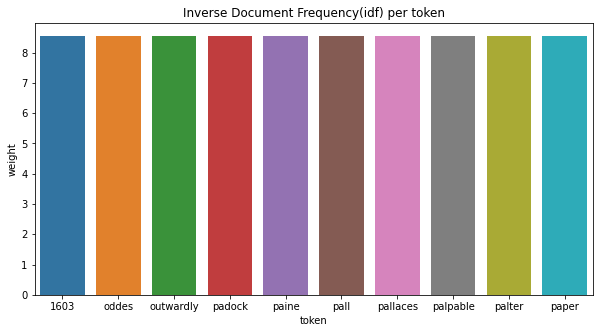

In [124]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)[:10]
import seaborn as sns
sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [125]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['the' 'and' 'to']

Features with highest idf:
['heauenly' 'griefes' 'youths']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [126]:
# find maximum value for each of the features over all of dataset:
max_val = txt_transformed.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

Features with lowest tfidf:
['macb' 'enter' 'macd']

Features with highest tfidf: 
['of' 'though' 'him']
